In [7]:
# !git clone https://github.com/rushic24/U-net-2D-EM-segmentation.git

In [1]:
!pip install treecount
!pip install Pillow
!pip install matplotlib pandas numpy
!apt-get install graphviz -y
!pip install pydot
!pip install SciPy
!pip install -U tensorboard-plugin-profile

  Created wheel for treecount: filename=treecount-0.0.2-py3-none-any.whl size=16560 sha256=0e2b24772051d995e7dfb500866555399fdda6aabf909330c2cee5b8691c3162
  Stored in directory: /root/.cache/pip/wheels/8d/17/d0/b3ef8da74d5c78ed450a6de854c043cd9e6aae93f397bdd4bf
Successfully built treecount
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
     |████████████████████████████████| 11.5 MB 7.9 MB/s eta 0:00:01    |███████████████████████████     | 9.8 MB 7.9 MB/s eta 0:00:01
     |████████████████████████████████| 503 kB 12.6 MB/s eta 0:00:01
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  fontconfig fontconfig-config fonts-dejavu-core fonts-liberation liba

debconf: delaying package configuration, since apt-utils is not installed
Selecting previously unselected package libbsd0:amd64.
(Reading database ... 20631 files and directories currently installed.)
Preparing to unpack .../00-libbsd0_0.10.0-1_amd64.deb ...
Unpacking libbsd0:amd64 (0.10.0-1) ...
Selecting previously unselected package libfribidi0:amd64.
Preparing to unpack .../01-libfribidi0_1.0.8-2_amd64.deb ...
Unpacking libfribidi0:amd64 (1.0.8-2) ...
Selecting previously unselected package ucf.
Preparing to unpack .../02-ucf_3.0038+nmu1_all.deb ...
Moving old data out of the way
Unpacking ucf (3.0038+nmu1) ...
Selecting previously unselected package libxau6:amd64.
Preparing to unpack .../03-libxau6_1%3a1.0.9-0ubuntu1_amd64.deb ...
Unpacking libxau6:amd64 (1:1.0.9-0ubuntu1) ...
Selecting previously unselected package libxdmcp6:amd64.
Preparing to unpack .../04-libxdmcp6_1%3a1.1.3-0ubuntu1_amd64.deb ...
Unpacking libxdmcp6:amd64 (1:1.1.3-0ubuntu1) ...
Selecting previously unselected

Selecting previously unselected package libgts-bin.
Preparing to unpack .../48-libgts-bin_0.7.6+darcs121130-4_amd64.deb ...
Unpacking libgts-bin (0.7.6+darcs121130-4) ...
Setting up libgraphite2-3:amd64 (1.3.13-11build1) ...
Setting up libpixman-1-0:amd64 (0.38.4-0ubuntu1) ...
Setting up libxau6:amd64 (1:1.0.9-0ubuntu1) ...
Setting up libdatrie1:amd64 (0.2.12-3) ...
Setting up liblab-gamut1:amd64 (2.42.2-3build2) ...
Setting up x11-common (1:7.7+19ubuntu14) ...
update-rc.d: warning: start and stop actions are no longer supported; falling back to defaults
invoke-rc.d: could not determine current runlevel
invoke-rc.d: policy-rc.d denied execution of start.
Setting up libjbig0:amd64 (2.1-3.1build1) ...
Setting up libgts-0.7-5:amd64 (0.7.6+darcs121130-4) ...
Setting up libx11-data (2:1.6.9-2ubuntu1.2) ...
Setting up libpathplan4:amd64 (2.42.2-3build2) ...
Setting up libann0 (1.1.2+doc-7build1) ...
Setting up libfribidi0:amd64 (1.0.8-2) ...
Setting up libwebp6:amd64 (0.6.1-2ubuntu0.20.04.1)

### Import the libraries

In [48]:
# define all imports here
import tensorflow as tf
from treecount import display_tree
import os
import io
import glob
from datetime import datetime
import numpy as np
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img,array_to_img
from keras.preprocessing.image import img_to_array, load_img,array_to_img
import numpy as np 
import glob
import numpy as np
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, Dropout, Cropping2D, concatenate, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler
from tensorflow.keras.preprocessing.image import array_to_img
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt
plt.figure(figsize=(26, 12))


<Figure size 2600x1200 with 0 Axes>

In [3]:
PATH = './'
display_tree(PATH)


$ Operating System : Linux
$ Path : .

*************** Directory Tree ***************

/
├── .git/
│   ├── branches/
│   ├── hooks/
│   │   └── *.sample:13
│   ├── info/
│   │   └── *:1
│   ├── logs/
│   │   └── refs/
│   │       ├── heads/
│   │       │   └── *:1
│   │       └── remotes/
│   │           └── origin/
│   │               └── *:1
│   │   └── *:1
│   ├── objects/
│   │   ├── info/
│   │   └── pack/
│   │       └── *.idx:1
│   │       └── *.pack:1
│   └── refs/
│       ├── heads/
│       │   └── *:1
│       ├── remotes/
│       │   └── origin/
│       │       └── *:1
│       └── tags/
│   └── *:5
├── .ipynb_checkpoints/
│   └── *.ipynb:2
├── __pycache__/
│   └── *.pyc:1
├── data/
│   ├── label/
│   │   └── images/
│   │       └── *.tif:30
│   ├── test/
│   │   └── *.tif:30
│   │   └── *:1
│   └── train/
│       └── images/
│           └── *.tif:30
│   └── *:1
├── logs/
│   └── fit/
│       └── 20211128-031713/
│           └── train/
│               └── *.v2:1
├── results/


In [5]:
os.chdir(PATH)
!mkdir -p data/train/images
!mkdir -p data/label/images
!mv data/train/*.tif data/train/images/
!mv data/label/*.tif data/label/images/
!rm data/train/iamges
!rm data/label/labels
from data import *


mv: cannot stat 'data/train/*.tif': No such file or directory
mv: cannot stat 'data/label/*.tif': No such file or directory
rm: cannot remove 'data/train/iamges': No such file or directory
rm: cannot remove 'data/label/labels': No such file or directory


## Augment the images

### Some analysis before we start augmenting       ---(1)


In [6]:
train_path="./data/train/images"
label_path="./data/label/images"
img_type="tif"

# get image paths
train_img_paths = glob.glob(train_path+"/*."+img_type)
label_img_paths = glob.glob(label_path+"/*."+img_type)

print('Using real-time data augmentation.')
i=0
img_t = load_img(f'{train_path}/{i}.{img_type}',grayscale=True)
img_l = load_img(f'{label_path}/{i}.{img_type}',grayscale=True)

plt.figure(figsize=(26, 12))
plt.subplot(1, 2, 1)
plt.title(f'img_t, type: {type(img_t)}', fontdict = {'fontsize' : 24})
plt.imshow(img_t, cmap="gray")

plt.subplot(1, 2, 2)
plt.title(f'img_l, type: {type(img_l)}', fontdict = {'fontsize' : 24})
plt.imshow(img_l, cmap="gray")

# convert tiff image file to np array
x_t = img_to_array(img_t)
x_l = img_to_array(img_l)

s=np.shape(x_t)
print(f'np.shape(x_t)= {s}')


img = np.ndarray(shape=(s[0],s[1],3),dtype=np.uint8)

# Why this ? so we can unmerge them later, and if we augment it, only the mask related to it will get augmented the same way    
img[:,:,0]=x_t[:,:,0]
img[:,:,2]=x_l[:,:,0]

print(f'img shape before reshape, {img.shape}')

# reshaping it into batch mode
img = img.reshape((1,) + img.shape)

print(f'img shape after reshape, {img.shape}')

Using real-time data augmentation.
np.shape(x_t)= (512, 512, 1)
img shape before reshape, (512, 512, 3)
img shape after reshape, (1, 512, 512, 3)


/usr/local/lib/python3.8/dist-packages/keras_preprocessing/image/utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


### Why not use tf.keras.utils.image_dataset_from_directory ?

This doesn't work because image_dataset_from_directory only supports jpg, png, bmp etc

In [13]:
# https://www.tensorflow.org/tutorials/load_data/images
# https://stackoverflow.com/questions/66895189/unable-to-load-multi-channel-tiff-files-using-tensorflow
# This doesn't work because image_dataset_from_directory only supports jpg, png, bmp etc

# train_ds = tf.keras.utils.image_dataset_from_directory(
#   data_dir,
#   validation_split=0.2,
#   subset="training",
#   seed=123,
#   image_size=(img_height, img_width),
#   batch_size=batch_size)


In [32]:
def rescaleImagesandMasks(img, mask=None):
    if(np.max(img) > 1):
        img = img / 255
        if mask:
            mask = mask /255
            mask[mask > 0.5] = 1
            mask[mask <= 0.5] = 0
    return (img,mask)
    

### Why not use tf.keras.utils.image_dataset_from_directory ?
Let us try if it works

In [9]:
# https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator
# https://discuss.tensorflow.org/t/proper-use-of-keras-imagedatagenerator-create-masks-for-segmentation-and-sample-weight-parameter/3134/3

data_gen_args = dict(rotation_range=10,
                        shear_range=0.1,
                        zoom_range=0.1,
                        horizontal_flip=True,
                        vertical_flip=True,
                        fill_mode='constant',
                        cval=0, validation_split= 0.2)

seed = 909 # (IMPORTANT) to transform image and corresponding mask with same augmentation parameter.

image_datagen = ImageDataGenerator(**data_gen_args) # custom fuction for each image you can use resnet one too.
mask_datagen = ImageDataGenerator(**data_gen_args)  # to make mask as feedable formate (256,256,1)

image_generator =image_datagen.flow_from_directory("data/train/",
                                                    color_mode='grayscale',
                                                    batch_size=16,
                                                    class_mode=None, seed=seed,
                                                    subset = 'training')  # Set as training data

mask_generator = mask_datagen.flow_from_directory("data/label/",
                                                  color_mode='grayscale',
                                                  batch_size=16,
                                                  class_mode=None, seed=seed,
                                                  subset = 'training')


def my_custom_train_generator():
    train_generator = zip(image_generator, mask_generator)
#     return train_generator
    for (img, mask) in train_generator:
        img, mask = rescaleImagesandMasks(img, mask)
        yield (img, mask)

Found 24 images belonging to 1 classes.
Found 24 images belonging to 1 classes.


In [10]:
validation_image_generator =image_datagen.flow_from_directory("data/train/",  # same directory as training data
                                                    color_mode='grayscale',
                                                    batch_size=16,
                                                    class_mode=None, seed=seed, # same seed
                                                    subset = 'validation') # set as validation data

validation_mask_generator = mask_datagen.flow_from_directory("data/label/",
                                                  color_mode='grayscale',
                                                  batch_size=16,
                                                  class_mode=None, seed=seed,
                                                  subset = 'validation')


def my_custom_validation_generator():
    train_generator = zip(validation_image_generator, validation_mask_generator)
#     return train_generator
    for (img, mask) in train_generator:
        img, mask = rescaleImagesandMasks(img, mask)
        yield (img, mask)

Found 6 images belonging to 1 classes.
Found 6 images belonging to 1 classes.


### The images and masks are in sync

0) sample_image.shape= (16, 256, 256, 1)
0) sample_image[0].shape= (256, 256, 1)
0) sample_mask.shape= (16, 256, 256, 1)
0) sample_mask[0].shape= (256, 256, 1)


<Figure size 2600x1200 with 0 Axes>

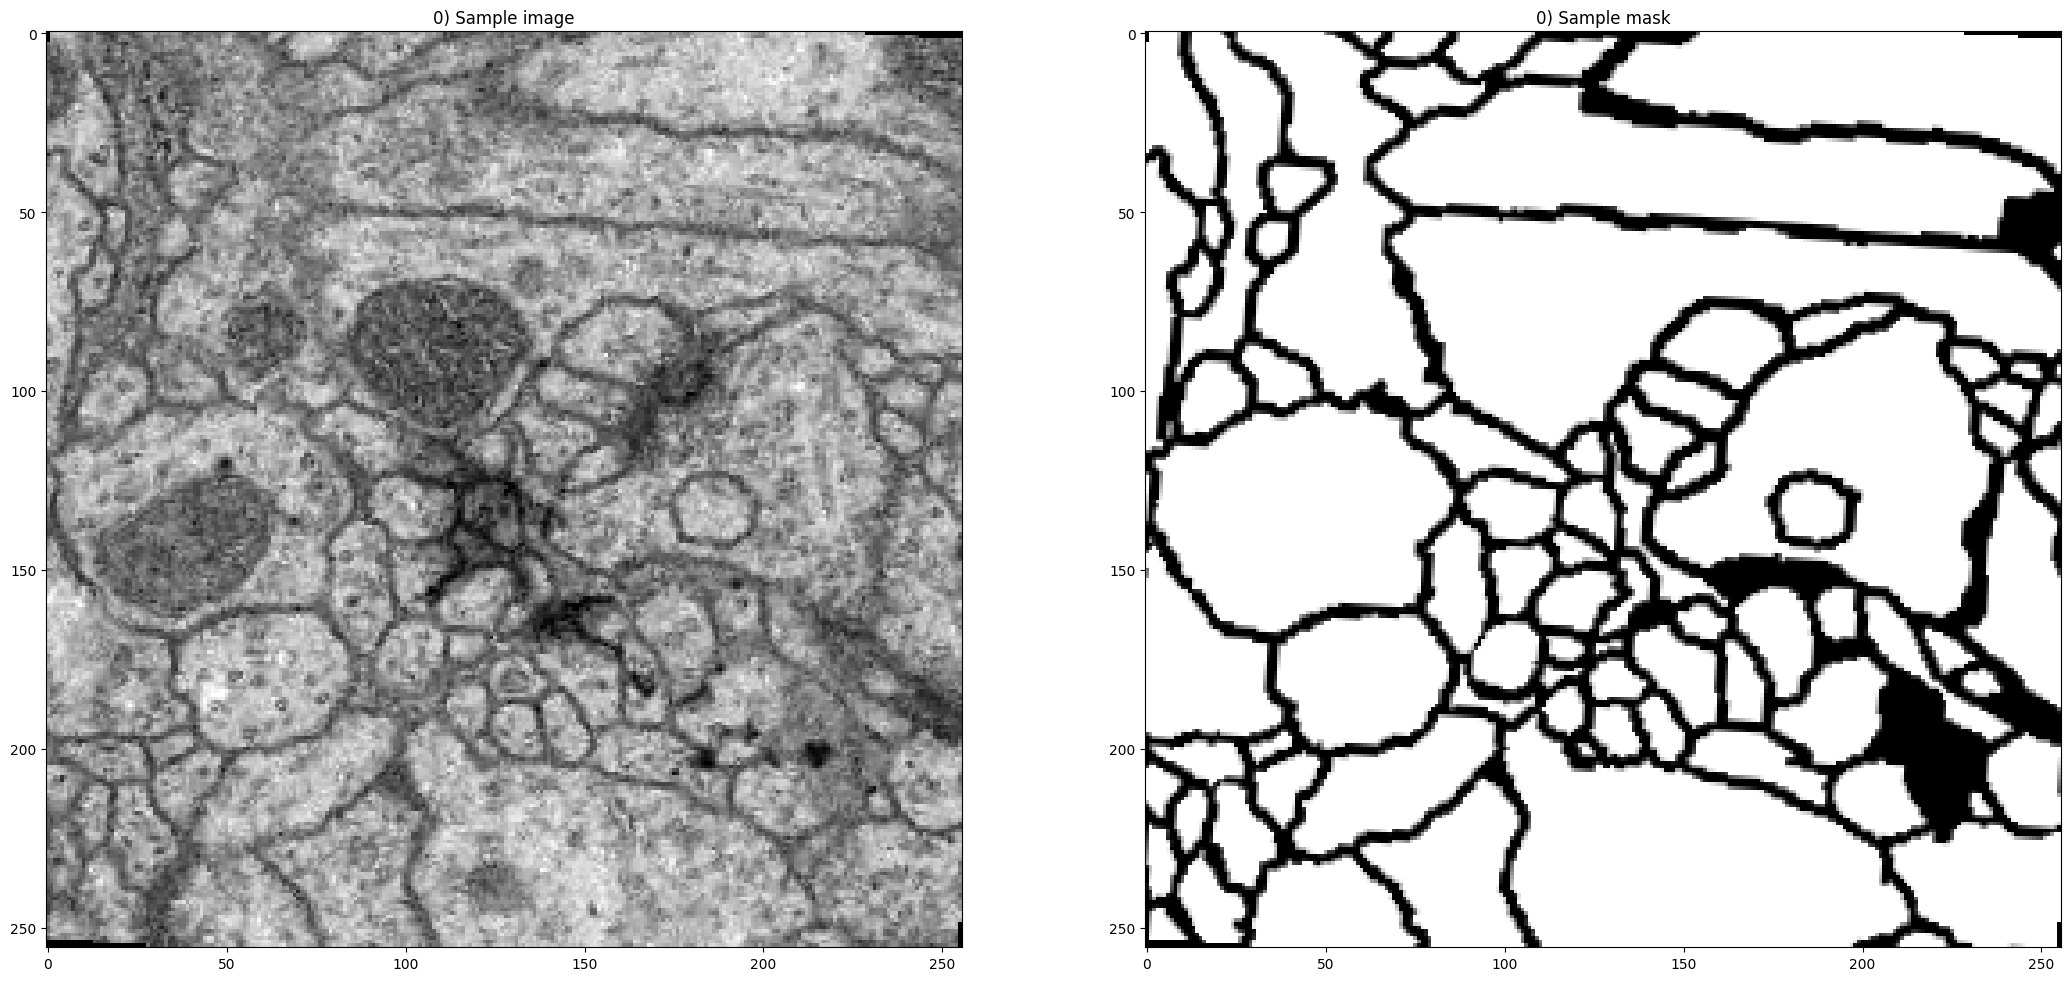

1) sample_image.shape= (8, 256, 256, 1)
1) sample_image[0].shape= (256, 256, 1)
1) sample_mask.shape= (8, 256, 256, 1)
1) sample_mask[0].shape= (256, 256, 1)


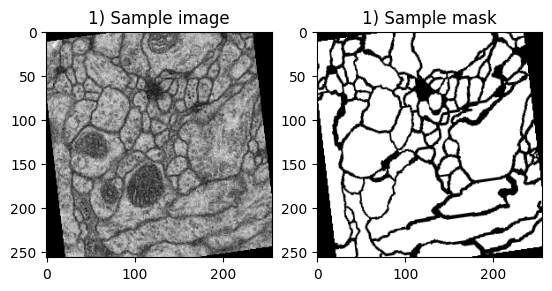

2) sample_image.shape= (16, 256, 256, 1)
2) sample_image[0].shape= (256, 256, 1)
2) sample_mask.shape= (16, 256, 256, 1)
2) sample_mask[0].shape= (256, 256, 1)


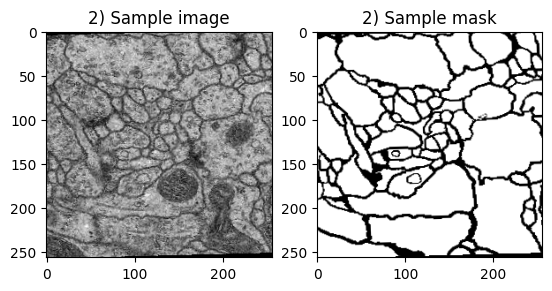

3) sample_image.shape= (8, 256, 256, 1)
3) sample_image[0].shape= (256, 256, 1)
3) sample_mask.shape= (8, 256, 256, 1)
3) sample_mask[0].shape= (256, 256, 1)


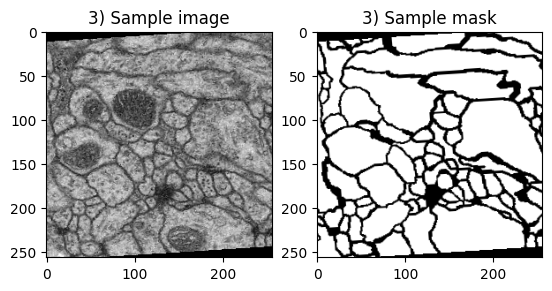

4) sample_image.shape= (16, 256, 256, 1)
4) sample_image[0].shape= (256, 256, 1)
4) sample_mask.shape= (16, 256, 256, 1)
4) sample_mask[0].shape= (256, 256, 1)


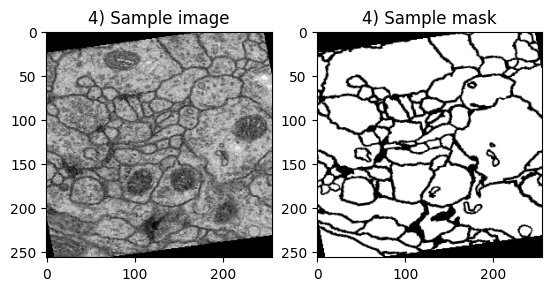

In [11]:
for i in range(5):
    sample_image = image_generator.next()
    print(f'{i}) sample_image.shape= {sample_image.shape}')
    print(f'{i}) sample_image[0].shape= {sample_image[0].shape}')

    plt.subplot(1, 2, 1)
    plt.title(f'{i}) Sample image')
    plt.imshow(sample_image[0].reshape(256, 256), cmap='gray')


    sample_mask = mask_generator.next()
    print(f'{i}) sample_mask.shape= {sample_mask.shape}')
    print(f'{i}) sample_mask[0].shape= {sample_mask[0].shape}')

    plt.subplot(1, 2, 2)
    plt.title(f'{i}) Sample mask')
    plt.imshow(sample_mask[0].reshape(256, 256), cmap='gray')
    plt.show()


#### It worked!!!

### If the above datagen.flow_from_directory didn't work, we need to go into a more manual approach like below

In [10]:
# def augmentation(path_aug='./results/aug'):
#     train_path="./data/train"
#     label_path="./data/label"
#     img_type="tif"
#     train_imgs = glob.glob(train_path+"/*."+img_type)
#     label_imgs = glob.glob(label_path+"/*."+img_type)
#     slices = len(train_imgs)
    
#     # return if length of train images != length of labels
#     if len(train_imgs) != len(label_imgs) or len(train_imgs) == 0:
#         print ("trains can't match labels")
#         return 0
    
#     # This we will read image file by file and do realtime data augmentation:
#     datagen = ImageDataGenerator(rotation_range=10,shear_range=0.1,zoom_range=0.1,horizontal_flip=True,vertical_flip=True,fill_mode='constant',cval=0)
#     print('starting...')
    
#     # iterate train/ label images one by one
#     for i in range(slices):
#         # read train image
#         img_t = load_img(train_path+"/"+str(i)+".tif",grayscale=True)
#         # read label image
#         img_l = load_img(label_path+"/"+str(i)+".tif",grayscale=True)

#         # refer ---(1) for this
#         x_t = img_to_array(img_t)
#         x_l = img_to_array(img_l)
#         s=np.shape(x_t)
#         img = np.ndarray(shape=(s[0],s[1],3),dtype=np.uint8)
      
#         img[:,:,0]=x_t[:,:,0]
#         img[:,:,2]=x_l[:,:,0]
        
#         # Now after having the image and the label joined, convert it into batch mode -> e.g. (256, 256, 3) -> (1, 256, 256, 3)
#         img = img.reshape((1,) + img.shape)
#         # set batch count to 0
#         batches = 0
#         # take the img we joined and augment it using datagen we created. Save the augmented images at path_aug
#         for batch in datagen.flow(img, batch_size=1, 
#                                   save_to_dir=path_aug, 
#                                   save_prefix=str(i), save_format='tif'):
#             batches += 1
#             # one batch will have 30 items
#             if batches >= 30:
#                 break
#             # we need to break the loop by hand because the generator loops indefinitely
#     # read augmented images paths
#     aug_imgs = glob.glob(path_aug+"/*.tif")

#     # create train and label folders in augmented images directory
#     savedir = path_aug + "/train"
#     if not os.path.lexists(savedir):
#         os.mkdir(savedir)
#     savedir = path_aug + "/label"
#     if not os.path.lexists(savedir):
#         os.mkdir(savedir)
#     i=0

#     # remove the joined img into img_train and img_label and save them at train and label directories
#     for imgname in aug_imgs:
#         img =load_img(imgname)
#         img=img_to_array(img)
       
#         img_train = img[:,:,:1]
#         img_label = img[:,:,2:]
#         img_train = array_to_img(img_train)
#         img_label = array_to_img(img_label)
#         img_train.save(path_aug+"/train/"+str(i)+".tif")
#         img_label.save(path_aug+"/label/"+str(i)+".tif")
#         i+=1

## Building the Unet model 

In [12]:
def get_model(img_rows=256, img_cols = 256):
    inputs = Input((img_rows, img_cols, 1))
    conv1 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(inputs)
    conv1 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
    conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool1)
    conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
    conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool2)
    conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
    conv4 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool3)
    conv4 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv4)
    drop4 = Dropout(0.5)(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(drop4)

    conv5 = Conv2D(1024, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool4)
    conv5 = Conv2D(1024, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv5)
    drop5 = Dropout(0.5)(conv5)

    up6 = Conv2D(512, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(drop5))
    merge6 = concatenate([drop4,up6], axis = 3)
    conv6 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge6)
    conv6 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv6)

    up7 = Conv2D(256, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv6))
    merge7 = concatenate([conv3,up7], axis = 3)
    conv7 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge7)
    conv7 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv7)

    up8 = Conv2D(128, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv7))
    merge8 = concatenate([conv2,up8], axis = 3)
    conv8 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge8)
    conv8 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv8)

    up9 = Conv2D(64, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv8))
    merge9 = concatenate([conv1,up9], axis = 3)
    conv9 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge9)
    conv9 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv9)
    conv9 = Conv2D(2, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv9)
    conv10 = Conv2D(1, 1, activation = 'sigmoid')(conv9)

    model = Model(inputs = inputs, outputs = conv10)

    model.compile(optimizer = Adam(lr = 1e-4), loss = 'binary_crossentropy', metrics = ['accuracy'])
    
    model.summary()
    
    
    return model

/usr/local/lib/python3.8/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 256, 256, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_24 (Conv2D)             (None, 256, 256, 64  640         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 conv2d_25 (Conv2D)             (None, 256, 256, 64  36928       ['conv2d_24[0][0]']              
                                )                                                           

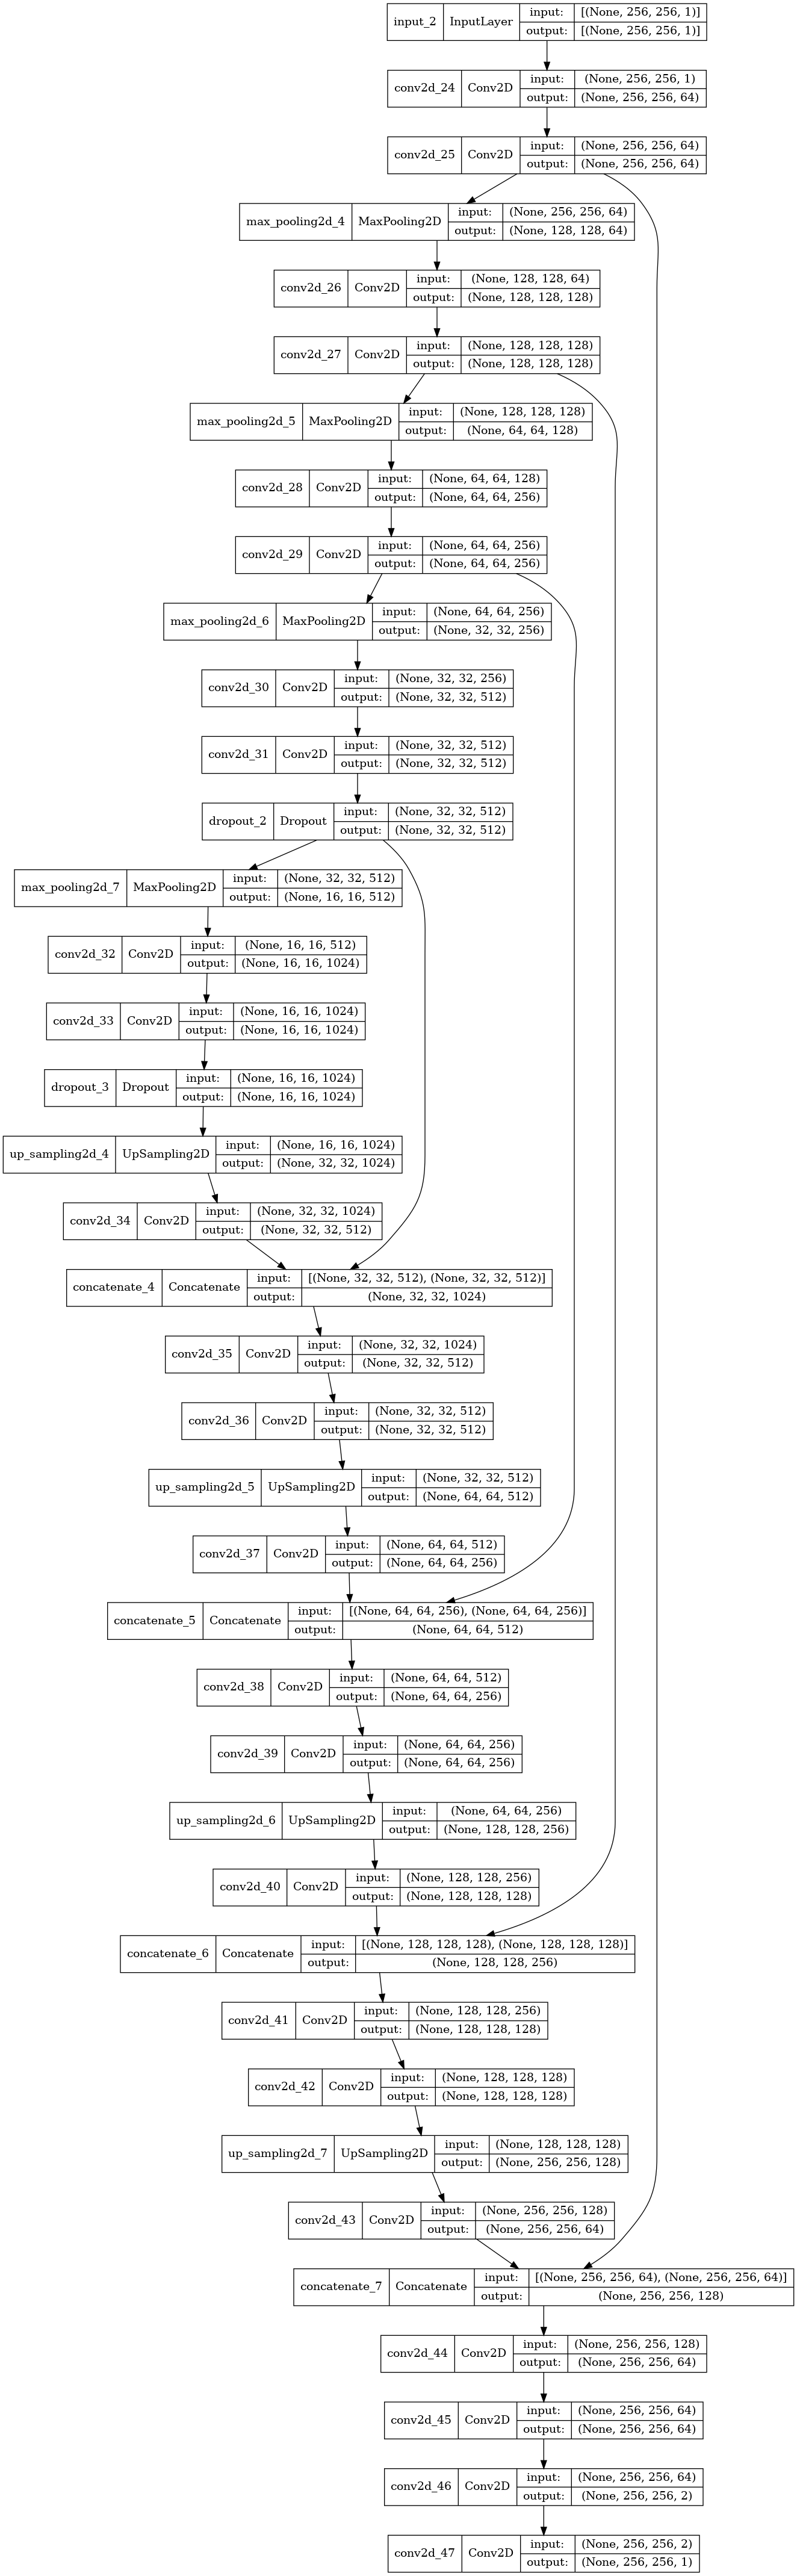

In [27]:
model = get_model()
plot_model(model, show_shapes=True)

In [14]:
model_checkpoint = ModelCheckpoint('unet.hdf5', monitor='loss',verbose=1, save_best_only=True)

## Running tensorboard before starting training

In [29]:
%load_ext tensorboard
!rm -rf loga/fit/*
log_dir = "logs/fit/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

In [30]:
%tensorboard --logdir logs/fit --bind_all

## Lets do model.fit

Accuracy remains 0 even after 10 epochs?

make sure images are normalized. Source: https://stackoverflow.com/questions/53654594/fit-generator-trains-with-0-accuracy

In [31]:
start_time = datetime.now()

history = model.fit(my_custom_train_generator(), 
                    epochs=5, verbose=1,
                    steps_per_epoch=2000,
                    shuffle=True, 
                    validation_data = my_custom_validation_generator(),
                    validation_steps=3,
                    callbacks=[model_checkpoint, tensorboard_callback])

end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

Epoch 1/5
2000/2000 [==============================] - ETA: 0s - loss: 0.1714 - accuracy: 0.9239
Epoch 00001: loss did not improve from 0.16299
2000/2000 [==============================] - 445s 222ms/step - loss: 0.1714 - accuracy: 0.9239 - val_loss: 0.2502 - val_accuracy: 0.9150
Epoch 2/5
2000/2000 [==============================] - ETA: 0s - loss: 0.1027 - accuracy: 0.9551
Epoch 00002: loss improved from 0.16299 to 0.10268, saving model to unet.hdf5
2000/2000 [==============================] - 470s 235ms/step - loss: 0.1027 - accuracy: 0.9551 - val_loss: 0.3014 - val_accuracy: 0.9134
Epoch 3/5
2000/2000 [==============================] - ETA: 0s - loss: 0.0828 - accuracy: 0.9638
Epoch 00003: loss improved from 0.10268 to 0.08279, saving model to unet.hdf5
2000/2000 [==============================] - 470s 235ms/step - loss: 0.0828 - accuracy: 0.9638 - val_loss: 0.3307 - val_accuracy: 0.9131
Epoch 4/5
2000/2000 [==============================] - ETA: 0s - loss: 0.0722 - accuracy: 0.968

In [66]:
def custom_test_generator(test_path= 'data/test', target_size = (256,256)):
    num_images = len(glob.glob(f'{test_path}/*'))
    for i in range(num_images):
        img = load_img(os.path.join(test_path, "%d.tif"%i), grayscale=True)
        img = img_to_array(img)
        img = img / 255
        img = tf.image.resize(img, target_size)
#         img = np.reshape(img,img.shape+(1,))
        img = np.reshape(img,(1,)+img.shape)
        yield img

#### Test if custom_test_generators work

In [67]:
x=custom_test_generator()

In [68]:
next(x).shape

(1, 256, 256, 1)

In [69]:
results = model.predict_generator(custom_test_generator(), 30, verbose=1)


<ipython-input-69-d956964d7cf3>:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  results = model.predict_generator(custom_test_generator(), 30, verbose=1)


30/30 [==============================] - 1s 9ms/step


In [71]:
results.shape

(30, 256, 256, 1)

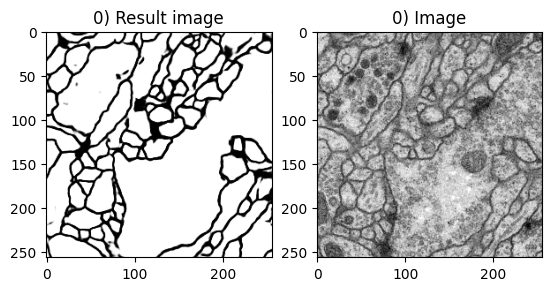

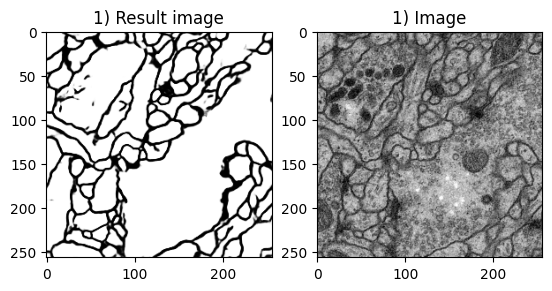

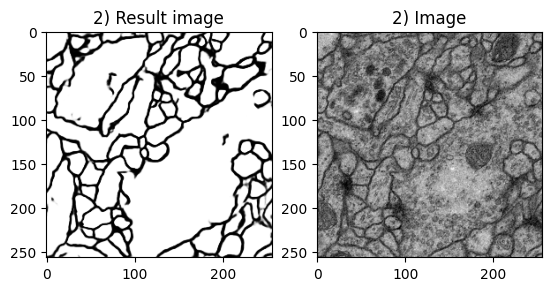

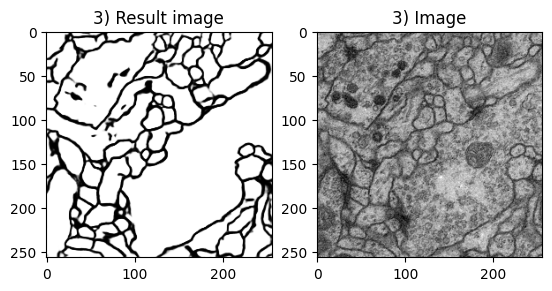

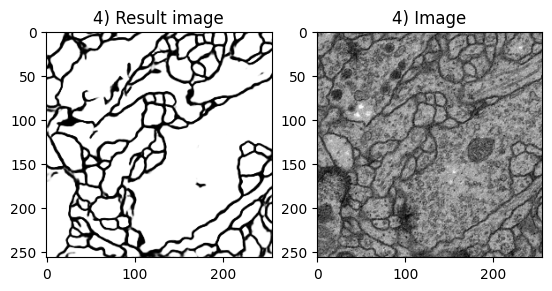

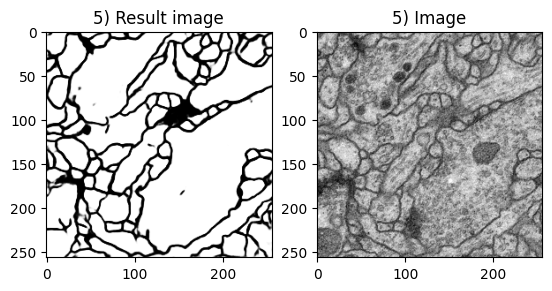

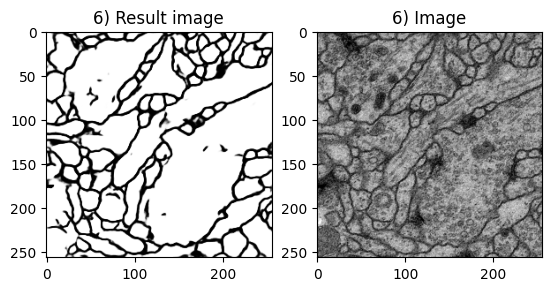

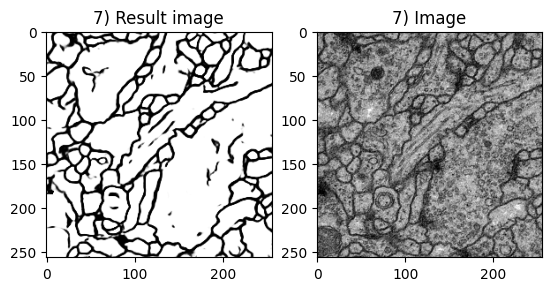

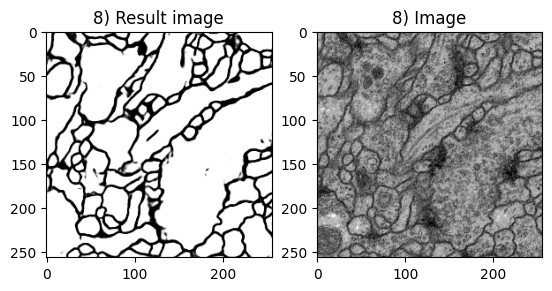

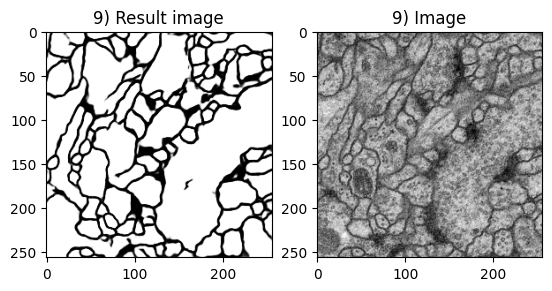

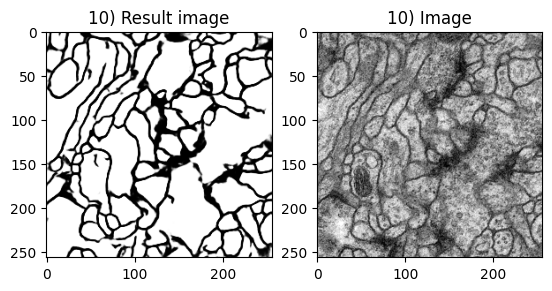

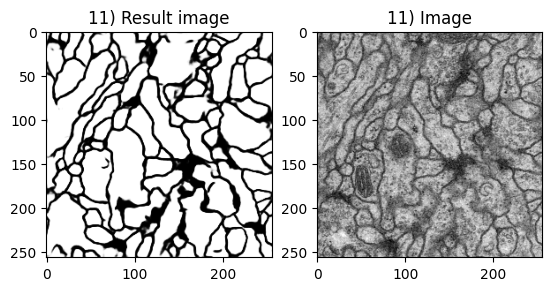

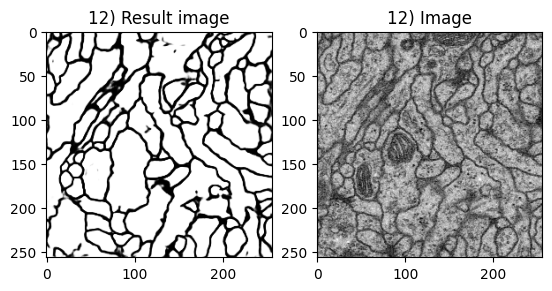

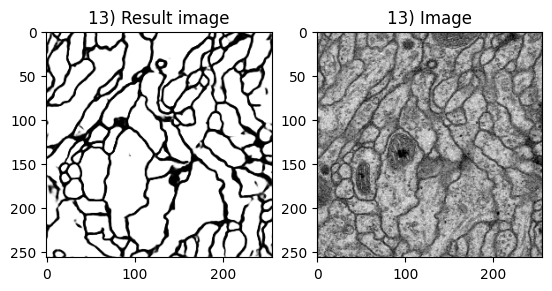

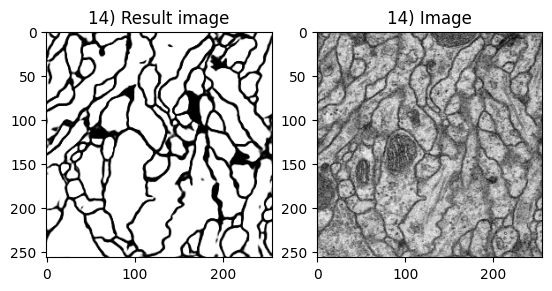

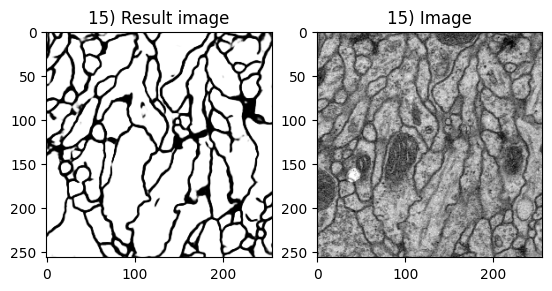

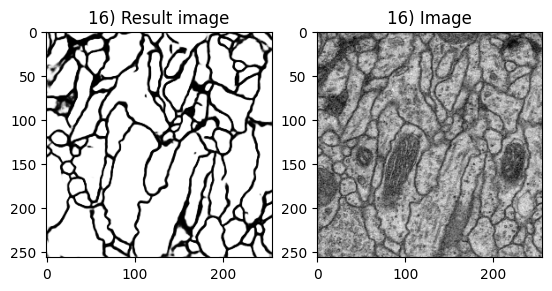

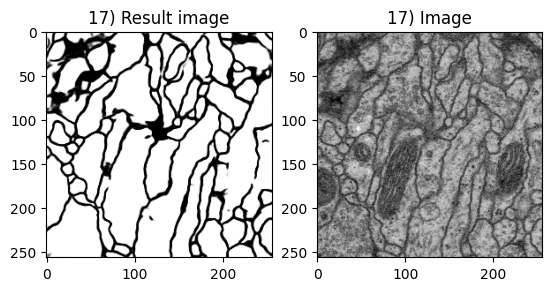

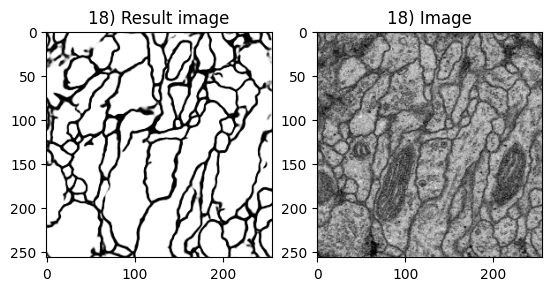

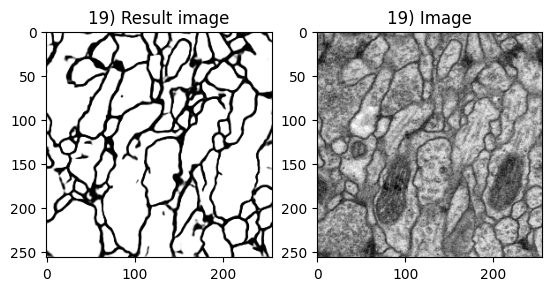

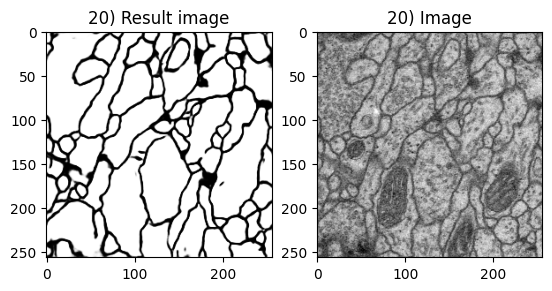

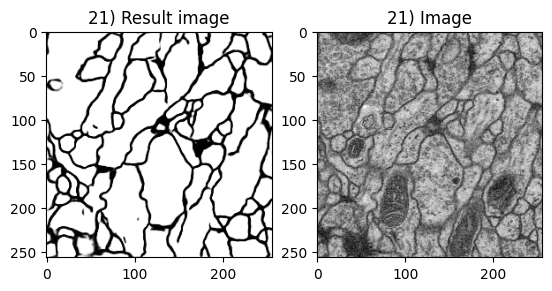

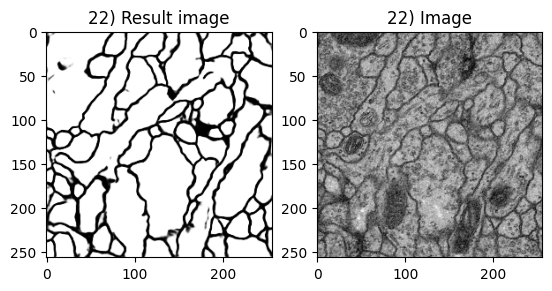

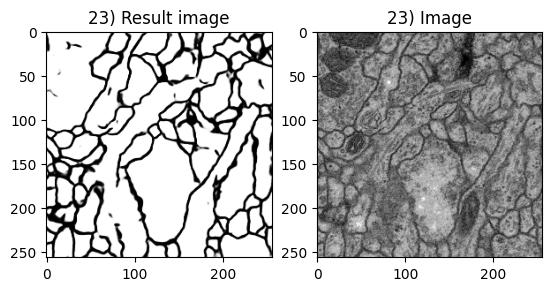

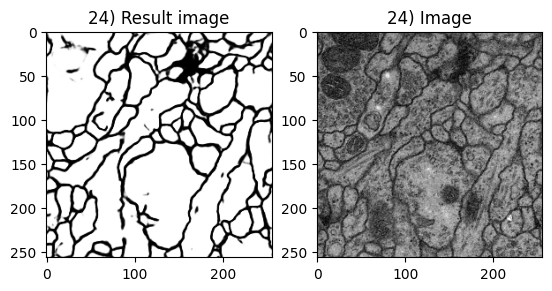

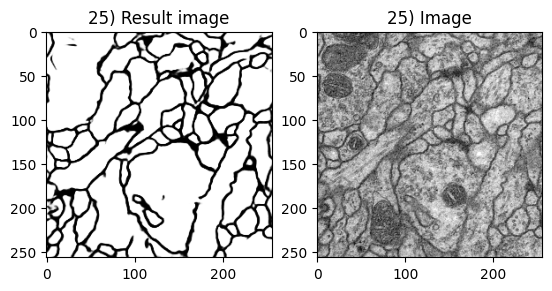

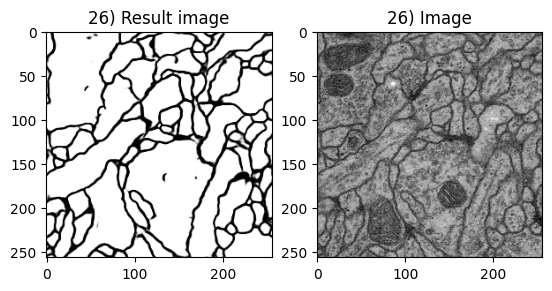

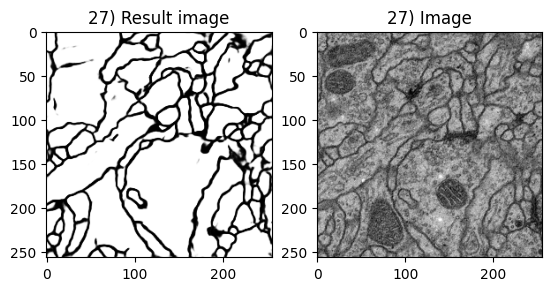

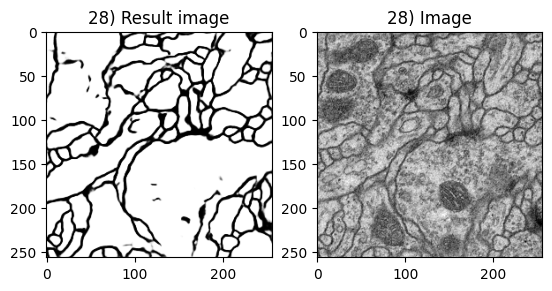

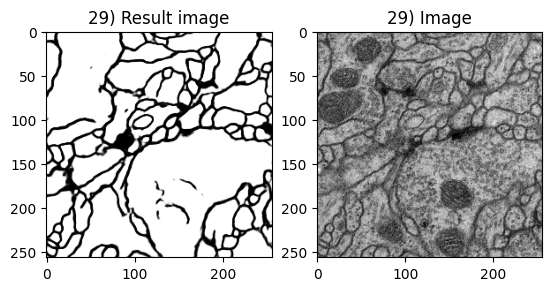

In [73]:
for i in range(len(results)):
    plt.subplot(1, 2, 1)
    plt.title(f'{i}) Result image')
    plt.imshow(results[i].reshape(256, 256), cmap='gray')
    
    img = load_img(os.path.join('data/test', "%d.tif"%i), grayscale=True)
    img = img_to_array(img)
    img = img / 255
    img = tf.image.resize(img, (256, 256))
    plt.subplot(1, 2, 2)
    plt.title(f'{i}) Image')
    plt.imshow(img, cmap='gray')
    plt.show()


## Things I learned

- If the number of images are less, use ImageDataGenerator to augment, no need to save those thousands of augmented images we can use fit_generator (now merged with fit()) and train model in realtime.

- If accuracy remains 0, make sure images are rescaled

- the output of ImageDataGenerator are iterators, you can parse them using .next() 

- The length of ImageDataGenerator augmented images goes till infinity, I tried doing print(len(image_generator)), but it was still processing after 20mins. Which is why I think there is if batch==30, break in the manual augmented commented code. Not sure about this let me know if you have any clue.

- Instead of realtime augmenting and training, If I can afford the storage, I can save all the augmented images and traverse them in a batch and fit. Iterative fitting of the model does incrementally train the model. Source:  https://stackoverflow.com/questions/39263002/calling-fit-multiple-times-in-keras

- Accuracy staying same between 0.64 and 0.65 for all 10 epochs? Lower down the learning_rate = 1e-3 to 1e-4

- Getting GPU overflow error? Reduce the batch size instead of thinking about a buying a better cloud.
- If I have no validation images, I can still give validation_split in ImageDataGenerator and create a validation_data_generator, Source: https://stackoverflow.com/questions/42443936/keras-split-train-test-set-when-using-imagedatagenerator
- Unet Paper https://www.youtube.com/watch?v=oLvmLJkmXuc
- Creating custom ImageDataGenerators
- Setting up docker with tensorflow-gpu, jupyter, tensorboard

#### 